In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')

C:\Users\casper\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.data.shape

(70000, 784)

Mnist veriseti içindeki rakam fotoğraflarını görmek için bir fonksiyon tanımlayalım

In [3]:
#parametre olarak dataframe ve ilgili veri fotoğraafının indx numarası alsın.

def showimage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

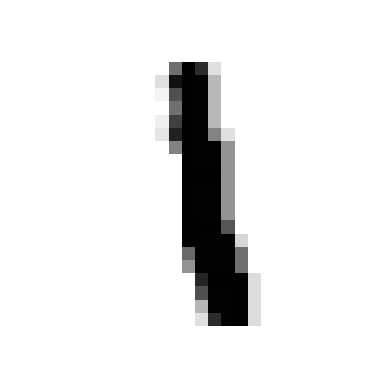

In [5]:
showimage(mnist.data,6)

# Split data->Training set ve Test set

In [7]:
#test ve train oranı 1/7 6/7 yapıyorum
train_img, test_img, train_lbl, test_lbl =train_test_split(mnist.data,mnist.target,test_size=1/7.0, random_state=0)


In [9]:
type(train_img)

pandas.core.frame.DataFrame

In [14]:
test_img_copy=test_img.copy()
#Rakam tahminlerimizi check etmek için train_img dataframini kopyalıyoruz, az sonra değişeceği için


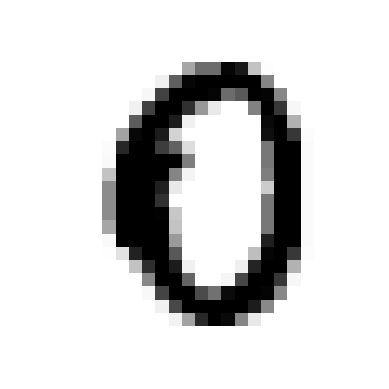

In [13]:
showimage(test_img_copy,0)

# Verilerimizi Scale etmemiz gerekiyor


Cünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor bu neddenle mutlaka scaling işleminden geçiriyoruz. Bu amaçlada StandardScaler kullanıyoruz

In [15]:
scaler = StandardScaler()

scaler.fit(train_img)
#scalerı sadece train üzeridnen fit yapmak yeterli oluyor

#transform işlemini ikisine de yapıyoruz

train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)

# PCA işlemini uyguluyoruz
Varlanceın %95 oranında korunmasını istediğimizi belirtiyoruz

In [16]:
pca=PCA(.95)


In [17]:
#PCA i sadece Training set e yapmanız yeterli
pca.fit(train_img)

PCA(n_components=0.95)

In [18]:
#bakalım 784 boyutu kaç boyuta düşürebilmişim (%95 koruyarak)
print(pca.n_components_)

327


In [19]:
#şimdi transform işlemiyle hem train hem de test veri setlerimizi 327 ye düşürelim
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)


# 2.Aşama
Şimdi makine öğrenmesi modelimiz olan Logistic Regression modelimizi PCA işleminden geçirilmiş veri setimiz üzerinden uygulayacağız

In [21]:
#default solver çok yavaş çalıştığı için daha hızlı olan lbfgs solveri seçerek logisticRegression nesnemizi oluşturuyoruz
logisticRegr = LogisticRegression(solver='lbfgs',max_iter=10000)

LogisticRegression modelimizi train datamızı kullanarak eğtiyoruz

In [23]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma gerçekleştirelim

In [25]:
logisticRegr.predict(test_img[0].reshape(1,-1))


array(['0'], dtype=object)

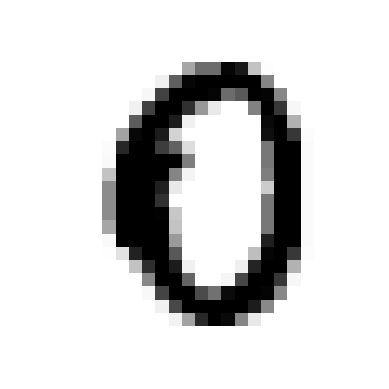

In [24]:
showimage(test_img_copy,0)

In [27]:
logisticRegr.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

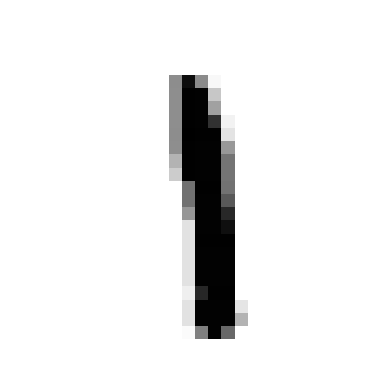

In [26]:
showimage(test_img_copy,2)

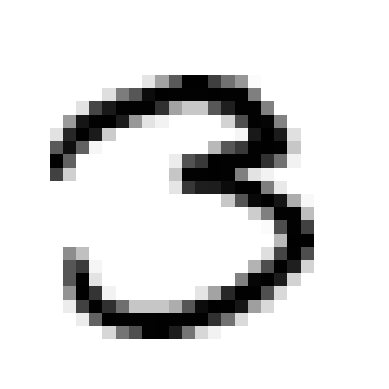

In [34]:
showimage(test_img_copy,653)

In [35]:
logisticRegr.predict(test_img[653].reshape(1,-1))

array(['3'], dtype=object)

Doğruluk oranına bakalım

In [36]:
logisticRegr.score(test_img,test_lbl)

0.9184

Sonuç ve değerlendirme

Bu projede PCA kullanarak logistic regression tarafından yapay zekanın eğitilme süresini önemli ölçüde kısalttık. Ben %95 variance korumayı hedefledim. Siz % 95  variance'ı daha düşük seviyelere çekerek sürenin ne ölçüde kısaltıdığını kendiniz deneyerek bulabilirsiniz. 10 tane digit için yapay zekanın eğitim süresini çok büyük ölçüde kısaltan PCA algoritması yüzlerce hatta binlerce değişik nesne tipi için yapay zekanın eğitim süresini saatler mertebesinde kısaltacak ve bu da sizin programlarınızın çok daha hızlı çalışmasını sağlayacaktır.


Bu proje ile birbirinden tamamen farklı 2 makine öğrenme modelini bir araya getirip günlük hayatta karşımıza çıkabilecek
bir işi bilgisayarımıza yapay zeka programı yazarak gerçekleştirdik ! 